In [280]:
import numpy as np; 
import matplotlib.pyplot as plt; 
%matplotlib inline

import pandas as pd 
#JU_frame = pd.read_csv('/home/jupyter/sd2e-community/ginkgo/novel-chassis/201808/Novelchassis-Nand-Gate/normal_library_prep/dataframes/star/ReadCountMatrix_preCAD.tsv',sep='\t');
JU_frame = pd.read_csv('NAND_Chassis_RNAseq_preCAD_TPM.tsv',sep='\t');                        
#                       201808/Novelchassis-Nand-Gate/normal_library_prep/dataframes/bowtie2/ReadCountMatrix_preCAD.tsv',sep='\t');
#JU_frame = pd.read_csv('/home/jupyter/sd2e-community/shared-q1-workshop/usaxena/reorded_bwa_ginkgo_normal_prep/Reordered_ReadCountMatrix_preCAD_FPKM.csv')
#https://jupyter.sd2e.org/user/eyeung/tree/sd2e-community/shared-q1-workshop/usaxena/reorded_bwa_ginkgo_normal_prep
#pd.read_csv('/home/jupyter/sd2e-community/ginkgo/novel-chassis/201808/Novelchassis-Nand-Gate/normal_library_prep/dataframes/star/'
                       
                       
#print(JU_frame.columns)                       
                       

In [282]:
all_column_names = JU_frame.columns;

# For parsing TACC columns 
new_column_names = [None]*len(all_column_names);
new_column_names[0] = all_column_names[0];
for col_ind in range(1,len(all_column_names)):
    column_name = str(all_column_names[col_ind]);
    #print(column_name)
    this_id = column_name.split('.')[-1];
    #print(this_id)
    new_column_names[col_ind] = this_id;
clear_JU_frame = pd.DataFrame(JU_frame);
clear_JU_frame.columns=new_column_names;#JU_frame.columns;



In [283]:
Synthetic_Genes = clear_JU_frame.gene_id[4098:]

In [284]:
import pickle
dict_file = open('dict_files.pickle','rb')
dict_list = pickle.load(dict_file);
strain_to_ids_dict = dict_list[0];
cond_dict = dict_list[1];

In [285]:
#clear_JU_frame.to_csv('Floated_Reordered_ReadCountMatrix_preCAD_Normal_TPM.csv')
clear_JU_frame = pd.DataFrame.from_csv('Floated_Reordered_ReadCountMatrix_preCAD_Normal_TPM.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


In [286]:

all_strains = strain_to_ids_dict.keys();
master_dict = dict();
for this_strain_id in all_strains:
    wt_ids = list(set(strain_to_ids_dict[this_strain_id]));
    
    data_by_cond_dict = dict();
    for wt_id in wt_ids:
        cond_num = cond_dict[wt_id];
        if cond_num[0]>0.0:
            ara_state = '1';
        else:
            ara_state = '0';
        if cond_num[1]>0.0:
            iptg_state = '1';
        else:
            iptg_state = '0';
        
        temperature=repr(int(cond_num[2]));
        timepoint = repr(int(cond_num[3]));
        replicate_num = repr(int(cond_num[4]));
        
        cond_key = ara_state+iptg_state+temperature+timepoint+ replicate_num;
        #print(wt_id)
        if wt_id in clear_JU_frame.columns:
            data_for_condition = clear_JU_frame[wt_id].as_matrix();
            #data_for_condition[data_for_condition<40] = 0.0;
            #print(data_for_condition.shape)
            for ind in range(0,data_for_condition.shape[0]):
                data_for_condition = data_for_condition;    

            if this_strain_id in master_dict.keys():
                if cond_key in master_dict[this_strain_id].keys():
                    master_dict[this_strain_id][cond_key].append(data_for_condition);    
                else:    
                    master_dict[this_strain_id][cond_key] = [data_for_condition];

            else:
                master_dict[this_strain_id] = dict(); 
                if cond_key in master_dict[this_strain_id].keys():
                    master_dict[this_strain_id][cond_key].append(data_for_condition);    
                else:    
                    master_dict[this_strain_id][cond_key] = [data_for_condition];
                


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [287]:
timepair_list = [];
for ind_cond in ['00']:
    for temp in ['37']:
        for replicate_ind in ['0','1','2','3']:
            pair_string = [ind_cond+temp+'5'+replicate_ind,ind_cond+temp+'18'+replicate_ind];
            timepair_list.append(pair_string);



In [288]:
#max_FKPM = 3e4;
all_genes = clear_JU_frame['gene_id'];
this_strain_id = 'MG1655_WT'
#this_strain_id = 'MG1655_NAND_Circuit'
#this_strain_id = 'MG1655_pJS007_LALT__P3__PhlF'
#this_strain_id = 'MG1655_IcaR_Gate'
timepoint_5hr_index = 0; 
timepoint_18hr_index = 1; 
T1_list = [];
T2_list = [];
for pair_tuple in timepair_list:
    x_vec = master_dict[this_strain_id][pair_tuple[timepoint_5hr_index]][0]
    y_vec = master_dict[this_strain_id][pair_tuple[timepoint_18hr_index]][0];
    
    T1_list.append(x_vec);
    T2_list.append(y_vec);

    
T1_list = np.asarray(T1_list,dtype=np.float32)
T2_list = np.asarray(T2_list,dtype=np.float32)

In [290]:


T1_list_raw = T1_list; 
T2_list_raw = T2_list;


#%autoreload
viz_this_set = True; 
timepair_list = [];
for ind_cond in ['01']:
    for temp in ['37']:
        for replicate_ind in ['0','1','2','3']:
            pair_string = [ind_cond+temp+'5'+replicate_ind,ind_cond+temp+'18'+replicate_ind];
            timepair_list.append(pair_string);
            
this_strain_id = 'MG1655_WT'
#this_strain_id = 'MG1655_NAND_Circuit'
#this_strain_id = 'MG1655_pJS007_LALT__P3__PhlF'
#this_strain_id = 'MG1655_IcaR_Gate'
timepoint_5hr_index = 0; 
timepoint_18hr_index = 1; 
T1_list = [];
T2_list = [];
for pair_tuple in timepair_list:
    x_vec = master_dict[this_strain_id][pair_tuple[timepoint_5hr_index]][0]
    y_vec = master_dict[this_strain_id][pair_tuple[timepoint_18hr_index]][0];
    
    T1_list.append(x_vec);
    T2_list.append(y_vec);
    

T1_list = np.asarray(T1_list,dtype=np.float32)
T2_list = np.asarray(T2_list,dtype=np.float32)

T1_list_raw = T1_list; 
T2_list_raw = T2_list;

#T1_list_log = np.log10(T1_list);
#T1_list_log[T1_list_log==-np.Inf] = 0.0;
#T2_list_log = np.log10(T2_list);
#T2_list_log[T2_list_log==-np.Inf] = 0.0;


T1_list = np.asarray(T1_list,dtype=np.float32)
T2_list = np.asarray(T2_list,dtype=np.float32)

T1_list_raw = T1_list; 
T2_list_raw = T2_list;


import sklearn;
from sklearn.preprocessing import Normalizer
transformer1 = Normalizer().fit(T1_list_raw)
T1_list = transformer1.transform(T1_list_raw)

transformer2 = Normalizer().fit(T2_list_raw)
T2_list =  transformer2.transform(T2_list_raw)



#T1_list_log = np.log10(T1_list);
#T1_list_log[T1_list_log==-np.Inf] = 0.0;
#T2_list_log = np.log10(T2_list);
#T2_list_log[T2_list_log==-np.Inf] = 0.0;

#T1_list = T1_list_log;
#T2_list = T2_list_log;

### Filtering Genes with Noise Higher Than Signal, Filtering (Fast Timescale) Steady-State Genes

In [291]:
#for sub_rep in [[0,1,2,3]]:
for sub_rep in [[0,1,2],[0,1,3],[1,2,3],[0,2,3],[0,1,2,3] ]:
    plt.figure(figsize=(10,10))


    mu_t1 = np.mean(T1_list[sub_rep][:],axis=0);
    s_t1 = np.std(T1_list[sub_rep][:],axis=0);

    mu_t2 = np.mean(T2_list[sub_rep][:],axis=0);
    s_t2 = np.std(T2_list[sub_rep][:],axis=0);
    cv1 = mu_t1-mu_t1;
    cv2 = mu_t2-mu_t2;
    low_cv_indices = [];
    for k in range(0,len(mu_t1)):
        good_cv = True;
        if mu_t1[k]>0.0:
            cv1[k] = s_t1[k]/mu_t1[k];
            if cv1[k]>0.1:
                good_cv = False;
        else:
            good_cv = False;
        if mu_t2[k]>0.0:
            cv2[k] = s_t2[k]/mu_t2[k];
            if cv2[k]>0.1:
                good_cv = False;
        else:
            good_cv=False;
            
        if mu_t1[k]>0.0 and mu_t2[k]>0.0:
            if np.abs(mu_t1[k]/ mu_t2[k] -1.0) <0.3:
                good_cv = False;
        
        if good_cv:
            low_cv_indices.append(k);
    #print(all_genes[low_cv_indices]);

    #plt.scatter((mu_t1),cv1,alpha=0.1);
    #plt.scatter((mu_t2),cv2,alpha=0.1);

    
#    plt.scatter(np.arange(0,T1_list.shape[1],1),cv1,alpha=0.1);
#    plt.scatter(np.arange(0,T2_list.shape[1],1),cv2,alpha=0.1);
    #ax = plt.gca();
    #ax.spines['right'].set_visible(False)
    #ax.spines['top'].set_visible(False)
    #sub_rep_str = [str(elem) for elem in sub_rep]
    #plt.legend(['Samples '+','.join(sub_rep_str)+' @ 5 hr','Samples ' + ','.join(sub_rep_str)+' @ 18 hr'] )
    #plt.ylim([-.05,0.6])
    #plt.ylabel('Coefficient of Variation (s/µ)')
    #plt.xlabel('Mean of FPKM (log)')
#plt.errorbar(np.arange(0,T2_list.shape[1],1),np.std(T2_list,axis=0)/np.mean(T2_list,axis=0) );
#plt.errorbar(np.arange(0,T2_list.shape[1],1), np.mean(T2_list,axis=0), yerr=np.std(T2_list,axis=0));
#plt.ylim([0,1e4]);

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [292]:
print("# of genes with low FPKM CV: " + repr(len(low_cv_indices)))
#print("# of genes with low FPKM CV: " + repr(len(all_genes)));

# of genes with low FPKM CV: 429


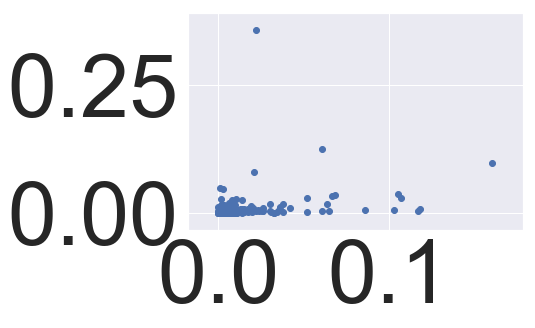

In [293]:
plt.scatter((mu_t1[low_cv_indices]),(mu_t2[low_cv_indices]))


In [294]:
thirtyseven_low_cv_indices = low_cv_indices;

In [295]:
lac_indices = [];
for ind in range(0,len(all_genes)):
    if 'lac' in str(all_genes[ind]):#.lower():
        lac_indices.append(ind)

ara_indices = [];
for ind in range(0,len(all_genes)):
    if 'ara' in str(all_genes[ind]):#.lower():
        ara_indices.append(ind)     

In [296]:
for ind in ara_indices:
    print(all_genes[ind])
    
for ind in lac_indices:
    print(all_genes[ind])

araD
araA
araB
araC
araJ
araH
araG
araF
araE
lacA
lacY
lacZ
lacI


In [297]:
#common_indices = list(set(thirtyseven_low_cv_indices).intersection( set(thirty_low_cv_indices) ));
common_indices = thirtyseven_low_cv_indices
common_indices = ara_indices+lac_indices;


In [298]:
circuit_ids = list(np.arange(4098,len(all_genes),1))#list(np.arange(0,13,1))
circuit_names = list(all_genes)[circuit_ids[0]:(circuit_ids[-1]+1)]
#print(circuit_names)
#len(circuit_ids)

In [299]:
# plt.figure(figsize=(20,20))
# for col_ind in [0,2,3]:
#     plt.bar(np.arange(1,len(circuit_ids),1),T2_list.T[circuit_ids[0]:circuit_ids[-1],col_ind],alpha=0.25)
    
# ax = plt.gca()
# ax.set_xticks(np.arange(1,len(circuit_ids),1))
# ax.set_xticklabels(circuit_names,rotation=-90,fontsize=14)
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# plt.legend(['Replicate 0','Replicate 2','Replicate 3'])

In [300]:
low_cv_reps = [0,2,3]
col_ind_map = [0,0,1,2]
Yp_data = np.zeros((len(common_indices),len(low_cv_reps)))
Yf_data = np.zeros((len(common_indices),len(low_cv_reps)))
for col_ind in low_cv_reps:
    Yp_data[:,col_ind_map[col_ind]] = T1_list.T[common_indices,col_ind];
    Yf_data[:,col_ind_map[col_ind]]= T2_list.T[common_indices,col_ind];




# for ind in range(0,Yp_data.shape[1]):
#     plt.figure()
#     plt.scatter(Yp_data[:,ind],Yf_data[:,ind])
#     plt.figure()
#     plt.scatter(Yp_data[:,ind],Yp_data[:,ind-1],color='r')
#     plt.figure()
#     plt.scatter(Yf_data[:,ind],Yf_data[:,ind-1],color='g')

In [301]:
!pip3 install --user cvxopt

from cvxopt import matrix, solvers
!pip3 install --user cvxpy


You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [302]:
from cvxpy import Minimize
from cvxpy import Minimize, Problem, Variable,norm1,installed_solvers,lambda_max;
from cvxpy import norm as cvxpynorm;
import cvxpy

In [304]:
#%autoreload
class Lifting:
    import numpy as np
    
    def __init__(self,this_index_of_used_functions,this_function_dictionary,this_num_input_vars):
        self.function_dictionary = list(this_function_dictionary);
        self.indices_of_used_functions = list(this_index_of_used_functions);
        self.num_input_vars = np.int(this_num_input_vars);
        
            
    def eval_lifting_list(self,input_var):
        import numpy as np;
        evaluated_lifting = -1.0;
        #if not (len(input_var)== self.num_input_vars):
        #    print("Error: input var supplied does not match target input var size:" + repr (self.num_input_vars));
        #    import numpy as np;
        #    return evaluated_lifting;
        #else:
        evaluated_lifting = [];
        for dict_index in self.indices_of_used_functions:
            this_dictionary_function = self.function_dictionary[dict_index];
            evaluated_lifting.append(this_dictionary_function(input_var))

        return evaluated_lifting;
    
    
    def eval_lifting_array(self,input_var):
        import numpy as np;
        evaluated_lifting = -1.0
        #if not (len(input_var)== self.num_input_vars):
        #    print("Error: input var supplied does not match target input var size:" + repr (self.num_input_vars));
        #    import numpy as np;
        #    return evaluated_lifting;

        evaluated_lifting = [];
        for dict_index in self.indices_of_used_functions:
            
            this_dictionary_function = self.function_dictionary[dict_index];
            evaluated_lifting.append(this_dictionary_function(input_var))
        
        return np.asarray(evaluated_lifting).reshape((len(evaluated_lifting),1));

    def append_lifting_terms(self,new_index_of_used_functions,new_function_dictionary,new_num_input_vars):
        
        try:
            if len(new_index_of_used_functions) > len(new_function_dictionary):
                raise Exception('number of indices of used functions should not exceed length of new function dictionary');
            self.indices_of_used_functions = self.indices_of_used_functions + list(new_index_of_used_functions + len(self.function_dictionary)); 
            self.num_input_vars = self.num_input_vars + new_num_input_vars;
            self.function_dictionary = self.function_dictionary + list(new_function_dictionary);
            return self;
        except (Exception):
            return -1.0;
        
    def lifting_dim(self):
        return len(self.indices_of_used_functions);
    
    def return_dim(self):
        return len(self.indices_of_used_functions);
    
    def print_Koopman_string_meme(self):
        print('Bro, are you even ' + repr(self)[10:] )
        
        
    #to do for AH and NB, what other abstract properties should a lifting class have? 
#%autoreload    

In [350]:
class InputKoopmanModel:
    def __init__(self,this_K_open_loop,this_state_lifting,this_K_input,this_input_lifting):
        self.K_open_loop = np.asarray(this_K_open_loop,dtype=np.float32)
        self.K_input =  np.asarray(this_K_input,dtype=np.float32)
        self.Psi_open_loop = this_state_lifting
        self.Psi_input = this_input_lifting
        
        self.Kol = self.K_open_loop
        self.Ki = self.K_input
        self.Pol = self.Psi_open_loop
        self.Pi = self.Psi_input
        
    def append_input(self,new_K_input,new_input_lifting):
        try:
            self.K_input = np.hstack((self.K_input,np.asarray(new_K_input,dtype=np.float32)));
        except:
            print(self.K_input.shape)
            print(new_K_input.shape)
        niuf= new_input_lifting.indices_of_used_functions;
        niv = new_input_lifting.num_input_vars; 
        nfd = new_input_lifting.function_dictionary;    
        self.Psi_input.append_lifting_terms(niuf,nfd,niv);
        
    def eval_diff(self,state_vec,input_vec):
        return np.dot(self.Kol,self.Pol.eval_lifting_array(state_vec))+ np.dot(self.Ki,self.Pi.eval_lifting_array(input_vec));
        
    def print_Koopman_string_meme(self):
        print('Bro, do you even lift?');
        
    
def calc_Input_Koopman(Kol,Yf,Yp,Up,flag=1,lambda_val=0.0,PsiDelta_Mat=[]):
    solver_instance = cvxpy.SCS;
    Ki = None;
    if flag==1: # moore penrose inverse, plain ol' least squares input-Koopman
        #Yp_inv = np.dot(np.transpose(Yp_final), np.linalg.inv( np.dot(Yp_final,np.transpose(Yp_final)) )   );
        Yfprime = Yf-np.dot(Kol,Yp)
        Up_inv = np.linalg.pinv(Up);
        Ki = np.dot(Yfprime,Up_inv);
        

    if flag ==2: # cvx optimization approach - L2 + L1 lasso 
        norm1_term = 0.0;
        all_col_handles = [None]*Up.shape[0]

        for i in range(0,Up.shape[0]):
            #print(Yf.shape[0])
            all_col_handles[i] = Variable(shape=(Yf.shape[0],1)) ;#Variable(shape=(Yf.shape[0],1) );
        #    if norm1_term < cvxpy.norm(all_col_handles[i],p=1):
        #        norm1_term = cvxpy.norm(all_col_handles[i],p=1);
            #norm1_term =  cvxpy.max(cvxpy.hstack( [norm1_term,cvxpy.norm(all_col_handles[i],p=1) ])  );
        operator = cvxpy.hstack(all_col_handles);
        
        if len(PsiDelta_Mat) == 0:
            if (type(lambda_val) == np.float):
                norm1_term =lambda_val*cvxpy.norm(operator,p='fro');
            else:
                lambda_val = np.reshape(lambda_val,(len(lambda_val),1));
                Unoise = np.tile(lambda_val,(1,Up.shape[1]))
                norm1_term = cvxpy.norm(cvxpy.matmul(operator,Unoise),p='fro');
        else:
            norm1_term = cvxpy.norm(cvxpy.matmul(operator,PsiDelta_Mat),p='fro');
        
        #operator = all_col_handles[0];
        #for i in range(1,Yf.shape[0]):
        #    operator = cvxpy.hstack([operator,all_col_handles[i]]);
        #operator.
        #print("[INFO]: CVXPY Koopman operator variable: " +repr(operator.shape));
        #print(repr(operator));
        #print("[INFO]: Yf.shape in calc_Koopman: " + repr(Yf.shape));
        #print("[INFO]: Yp.shape in calc_Koopman: " + repr(Yp.shape));
        Yfprime = Yf-np.dot(Kol,Yp)
        norm2_fit_term = cvxpy.norm(cvxpy.norm(Yfprime-operator*Up,p=2,axis=0),p=2);
        objective = Minimize(norm2_fit_term + norm1_term)
        constraints = [];
        prob = Problem(objective,constraints);
        result = prob.solve(verbose=True,solver=solver_instance,max_iters=np.int(1e7))#,reltol=1e-10,abstol=1e-10);
        print("[INFO]: Finished executing cvx solver, printing CVXPY problem status")
        print(prob.status);
        Ki = operator.value;
    return Ki;
        
def calc_Append_Input_Koopman(Kol,Ki,Yf,Yp,Up,Uamend,flag=1,lambda_uamend_val= 0.0):
    solver_instance = cvxpy.SCS;
    Kamend = None;
    if flag==1: # moore penrose inverse, plain ol' least squares input-Koopman
        #Yp_inv = np.dot(np.transpose(Yp_final), np.linalg.inv( np.dot(Yp_final,np.transpose(Yp_final)) )   );
        Yfprime = Yf-np.dot(Kol,Yp)-np.dot(Ki,Up);
        Ua_inv = np.linalg.pinv(Uamend);
        Kamend = np.dot(Yfprime,Ua_inv);
        
        
    
    if flag ==2: # cvx optimization approach - L2 + L1 lasso 
        norm1_term = 0.0;
        all_col_handles = [None]*Uamend.shape[0]
        for i in range(0,Uamend.shape[0]):            
            all_col_handles[i] = Variable(shape=(Yf.shape[0],1));#Variable(shape=(Yf.shape[0],1) );
        
        operator = cvxpy.hstack(all_col_handles);

        if type(lambda_uamend_val) == np.float:
            lambda_uamend_val = [lambda_uamend_val]*Uamend.shape[0];
            lambda_uamend_val = np.reshape(lambda_uamend_val,(len(lambda_uamend_val),1));
            Unoise = np.tile(lambda_uamend_val,(1,Uamend.shape[1]));
        else:
            Unoise = np.tile(lambda_uamend_val,(1,Uamend.shape[1]));
        norm1_term = cvxpy.norm(cvxpy.matmul(operator,Unoise),p='fro');
        #operator = all_col_handles[0];
        #for i in range(1,Yf.shape[0]):
        #    operator = cvxpy.hstack([operator,all_col_handles[i]]);
        #operator.
        #print("[INFO]: CVXPY Koopman operator variable: " +repr(operator.shape));
        #print(repr(operator));
        #print("[INFO]: Yf.shape in calc_Koopman: " + repr(Yf.shape));
        #print("[INFO]: Yp.shape in calc_Koopman: " + repr(Yp.shape));
        Yfprime = Yf- np.dot(Kol,Yp)-np.dot(Ki,Up)
        norm2_fit_term = cvxpy.norm(cvxpy.norm(Yfprime-operator*Uamend,p=2,axis=0),p=2);
        objective = Minimize(norm2_fit_term + lambda_val*norm1_term)
        constraints = [];
        prob = Problem(objective,constraints);
        result = prob.solve(verbose=True,solver=solver_instance,max_iters=np.int(1e7))#,reltol=1e-10,abstol=1e-10);
        print("[INFO]: Finished executing cvx solver, printing CVXPY problem status")
        print(prob.status);
        Kamend = operator.value;
    return Kamend;        

def train_Append_Input_Koopman(Xf,Xp,unl_Up,unl_UAmend,this_InputKoopmanModel,AmendLifting,num_rawstates,num_rawinputs,num_rawamendinputs,num_snapshots):
    if Xf.shape[1] == num_rawstates:
        Xf = Xf.T;
    if Xp.shape[1] ==num_rawstates:
        Xp = Xp.T; 
    if unl_Up.shape[1] == num_rawinputs:
        unl_Up = unl_Up.T; 
    if unl_UAmend.shape[1] == num_rawamendinputs:
        unl_UAmend = unl_UAmend.T;
        
    PsiXf = np.zeros(this_InputKoopmanModel.Pol.return_dim(),Xf.shape[1]);
    for ind in range(0,Xf.shape[1]):
        PsiXf[:,ind] = this_InputKoopmanModel.Pol.eval_lifting_array(Xf[:,ind]);
    
    PsiXp = np.zeros(this_InputKoopmanModel.Pol.return_dim(),Xp.shape[1]);
    for ind in range(0,Xp.shape[1]):
        PsiXp[:,ind] = this_InputKoopmanModel.Pol.eval_lifting_array(Xp[:,ind]);
    
    PsiUp = np.zeros(this_InputKoopmanModel.Pi.return_dim(),unl_Up.shape[1]);
    for ind in range(0,unl_Up.shape[1]):
        PsiUp[:,ind] = this_InputKoopmanModel.Pi.eval_lifting_array(unl_Up[:,ind]);
    
    PsiAUp = np.zeros(AmendLifting.return_dim(),unl_UAmend.shape[1]);
    for ind in range(0,unl_UAmend.shape[1]):
        PsiAUp[:,ind] = AmendLifting.eval_lifting_array(unl_UAmend[:,ind]);
    
    this_Kol = this_InputKoopmanModel.Kol;
    this_Ki = this_InputKoopmanModel.Ki;
    calc_Append_Input_Koopman(this_Kol,this_Ki,PsiXf,PsiXp,PsiUp,PsiAUp,flag=1,lambda_val=0.0)
    
#%autoreload        

In [347]:
def calc_Koopman(Yf,Yp,flag=1,lambda_val=0.0):
    #solver_instance = cvxpy.CVXOPT;
    solver_instance = cvxpy.SCS;
    if flag==1: # moore penrose inverse, plain ol' least squares Koopman
        #Yp_inv = np.dot(np.transpose(Yp_final), np.linalg.inv( np.dot(Yp_final,np.transpose(Yp_final)) )   );
        Yp_inv = np.linalg.pinv(Yp);
        K = np.dot(Yf,Yp_inv);
        

    if flag ==2: # cvx optimization approach - L2 + L1 lasso 
        norm1_term = 0.0;
        all_col_handles = [None]*Yf.shape[0]
        if type(lambda_val)== np.float:
            lambda_val = list([lambda_val]*Yf.shape[0]);
        
        for i in range(0,Yf.shape[0]):                 
            all_col_handles[i] = Variable(shape=(Yf.shape[0],1)) ;#Variable(shape=(Yf.shape[0],1) );

        operator = cvxpy.hstack(all_col_handles);
        
        if type(lambda_val) == np.float:
            norm1_term =lambda_val*cvxpy.norm(operator,p='fro');
        else:
            lambda_val = np.reshape(lambda_val,(len(lambda_val),1));
            Unoise = np.tile(lambda_val,(1,Yf.shape[1]));
            norm1_term = cvxpy.norm(cvxpy.matmul(operator + np.eye(Yf.shape[0]),Unoise),p='fro');


        #operator = all_col_handles[0];
        #for i in range(1,Yf.shape[0]):
        #    operator = cvxpy.hstack([operator,all_col_handles[i]]);
        #operator.
        #print("[INFO]: CVXPY Koopman operator variable: " +repr(operator.shape));
        #print(repr(operator));
        #print("[INFO]: Yf.shape in calc_Koopman: " + repr(Yf.shape));
        #print("[INFO]: Yp.shape in calc_Koopman: " + repr(Yp.shape));
        norm2_fit_term = cvxpy.norm(cvxpy.norm(Yf-operator*Yp,p=2,axis=0),p=2);
        objective = Minimize(norm2_fit_term + norm1_term)
        constraints = [];
        prob = Problem(objective,constraints);
        result = prob.solve(verbose=True,solver=solver_instance,max_iters=np.int(1e7))#,reltol=1e-10,abstol=1e-10);
        print("[INFO]: Finished executing cvx solver, printing CVXPY problem status")
        print(prob.status);
        K = operator.value;

    if flag ==3:
        operator = Variable(Yf.shape[0],Yf.shape[0])
        objective = Minimize(cvxpynorm(operator,2))
        constraints = [cvxpynorm(Yf-operator*Yp,'fro')/cvxpynorm(Yf,'fro')<0.01 ]
        prob = Problem(objective, constraints)
        result = prob.solve(verbose=True)#(solver=solver_instance);
        print(prob.status);
        K = operator.value;

    return K;

In [348]:
Circuit_Gene_Names = circuit_names;
Circuit_Genes = circuit_ids;

#for ind in range(0,len(all_genes)):
#    gene = all_genes[ind];
#    if 'IcaR' in gene or 'PhlF' in gene or 'GFP' in gene or 'pTrc' in gene or 'LacI' in gene or 'AraC' in gene or 'LuxR' in gene:
        #print(gene) 
#        Circuit_Genes.append(ind);

circuit_gene_in_indices = [];        
for ind in range(0,len(Circuit_Genes)):
    circuit_gene = Circuit_Genes[ind];
    #print(common_indices)
    if circuit_gene in common_indices:
        circuit_gene_in_indices.append(circuit_gene);
        print(Circuit_Gene_Names[ind] + " was included")
    if not (circuit_gene in common_indices):
        None;
        #print(Circuit_Gene_Names[ind])
    else:
        circuit_gene_in_indices.append(circuit_gene);
        

circuit_coords_in_K = set();        
for this_index in circuit_gene_in_indices:
    circuit_coords_in_K.add(common_indices.index(this_index));
circuit_coords_in_K = list(circuit_coords_in_K)

## Discover Open-Loop Host Dynamics

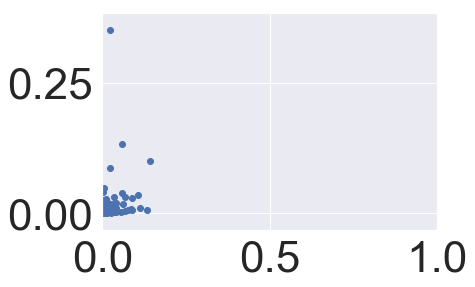

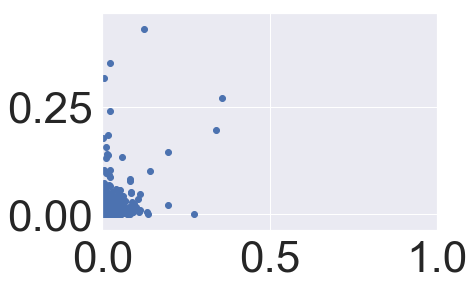

In [336]:
#%autoreload
viz_this_set = True; 
timepair_list = [];
for ind_cond in ['00']:
    for temp in ['37']:
        for replicate_ind in ['0','1','2','3']:
            pair_string = [ind_cond+temp+'5'+replicate_ind,ind_cond+temp+'18'+replicate_ind];
            timepair_list.append(pair_string);
            
this_strain_id = 'MG1655_WT'
#this_strain_id = 'MG1655_NAND_Circuit'
#this_strain_id = 'MG1655_pJS007_LALT__P3__PhlF'
#this_strain_id = 'MG1655_IcaR_Gate'
timepoint_5hr_index = 0; 
timepoint_18hr_index = 1; 
T1_list = [];
T2_list = [];
for pair_tuple in timepair_list:
    x_vec = master_dict[this_strain_id][pair_tuple[timepoint_5hr_index]][0]
    y_vec = master_dict[this_strain_id][pair_tuple[timepoint_18hr_index]][0];
    
    T1_list.append(x_vec);
    T2_list.append(y_vec);
    

T1_list = np.asarray(T1_list,dtype=np.float32)
T2_list = np.asarray(T2_list,dtype=np.float32)

T1_list_raw = T1_list; 
T2_list_raw = T2_list;

#T1_list_log = np.log10(T1_list);
#T1_list_log[T1_list_log==-np.Inf] = 0.0;
#T2_list_log = np.log10(T2_list);
#T2_list_log[T2_list_log==-np.Inf] = 0.0;


T1_list = np.asarray(T1_list,dtype=np.float32)
T2_list = np.asarray(T2_list,dtype=np.float32)

T1_list_raw = T1_list; 
T2_list_raw = T2_list;


import sklearn;
from sklearn.preprocessing import Normalizer
transformer1 = Normalizer().fit(T1_list_raw)
T1_list = transformer1.transform(T1_list_raw)

transformer2 = Normalizer().fit(T2_list_raw)
T2_list =  transformer2.transform(T2_list_raw)

T1_list_log_norm = T1_list;
T2_list_log_norm = T2_list;
#T2_list = T2_list_log;

low_cv_reps = [0,2,3]
col_ind_map = [0,0,1,2]

if viz_this_set:
    mu_t1 = np.mean(T1_list_log_norm[low_cv_reps][:],axis=0);
    s_t1 = np.std(T1_list_log_norm[low_cv_reps][:],axis=0);

    mu_t2 = np.mean(T2_list_log_norm[low_cv_reps][:],axis=0);
    s_t2 = np.std(T2_list_log_norm[low_cv_reps][:],axis=0);
    cv1 = mu_t1-mu_t1;
    cv2 = mu_t2-mu_t2;
    plt.figure()
    plt.scatter((mu_t1[low_cv_indices]),(mu_t2[low_cv_indices]))
    plt.xlim([0.0,1.0])
    plt.figure()
    plt.scatter(mu_t1,mu_t2)
    plt.xlim([0.0,1.0])


Yp_data = np.zeros((len(common_indices),len(low_cv_reps)))
Yf_data = np.zeros((len(common_indices),len(low_cv_reps)))


for col_ind in low_cv_reps:
    Yp_data[:,col_ind_map[col_ind]] = T1_list_log_norm.T[common_indices,col_ind];
    Yf_data[:,col_ind_map[col_ind]]= T2_list_log_norm.T[common_indices,col_ind];



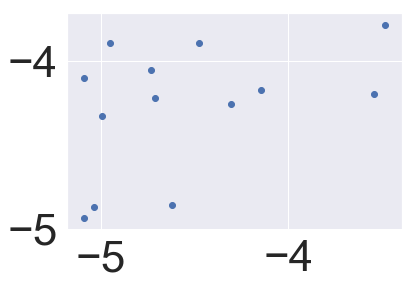

In [337]:
plt.scatter(np.log10(lambda_val_vec_p),np.log10(lambda_val_vec_f))

WARN: m less than n, problem likely degenerate
----------------------------------------------------------------------------
	SCS v2.1.0 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 1022
eps = 1.00e-04, alpha = 1.50, max_iters = 10000000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-03
Variables n = 174, constraints m = 86
Cones:	soc vars: 86, soc blks: 5
Setup time: 5.40e-03s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 7.23e+17  5.67e+19  1.00e+00 -6.34e+17  6.81e+13  2.88e+17  1.02e-02 
    11| 5.47e-14  3.23e-12  6.72e-15  6.98e-15  1.37e-14  7.68e-20  1.26e-02 
------------------------------------------------------------------

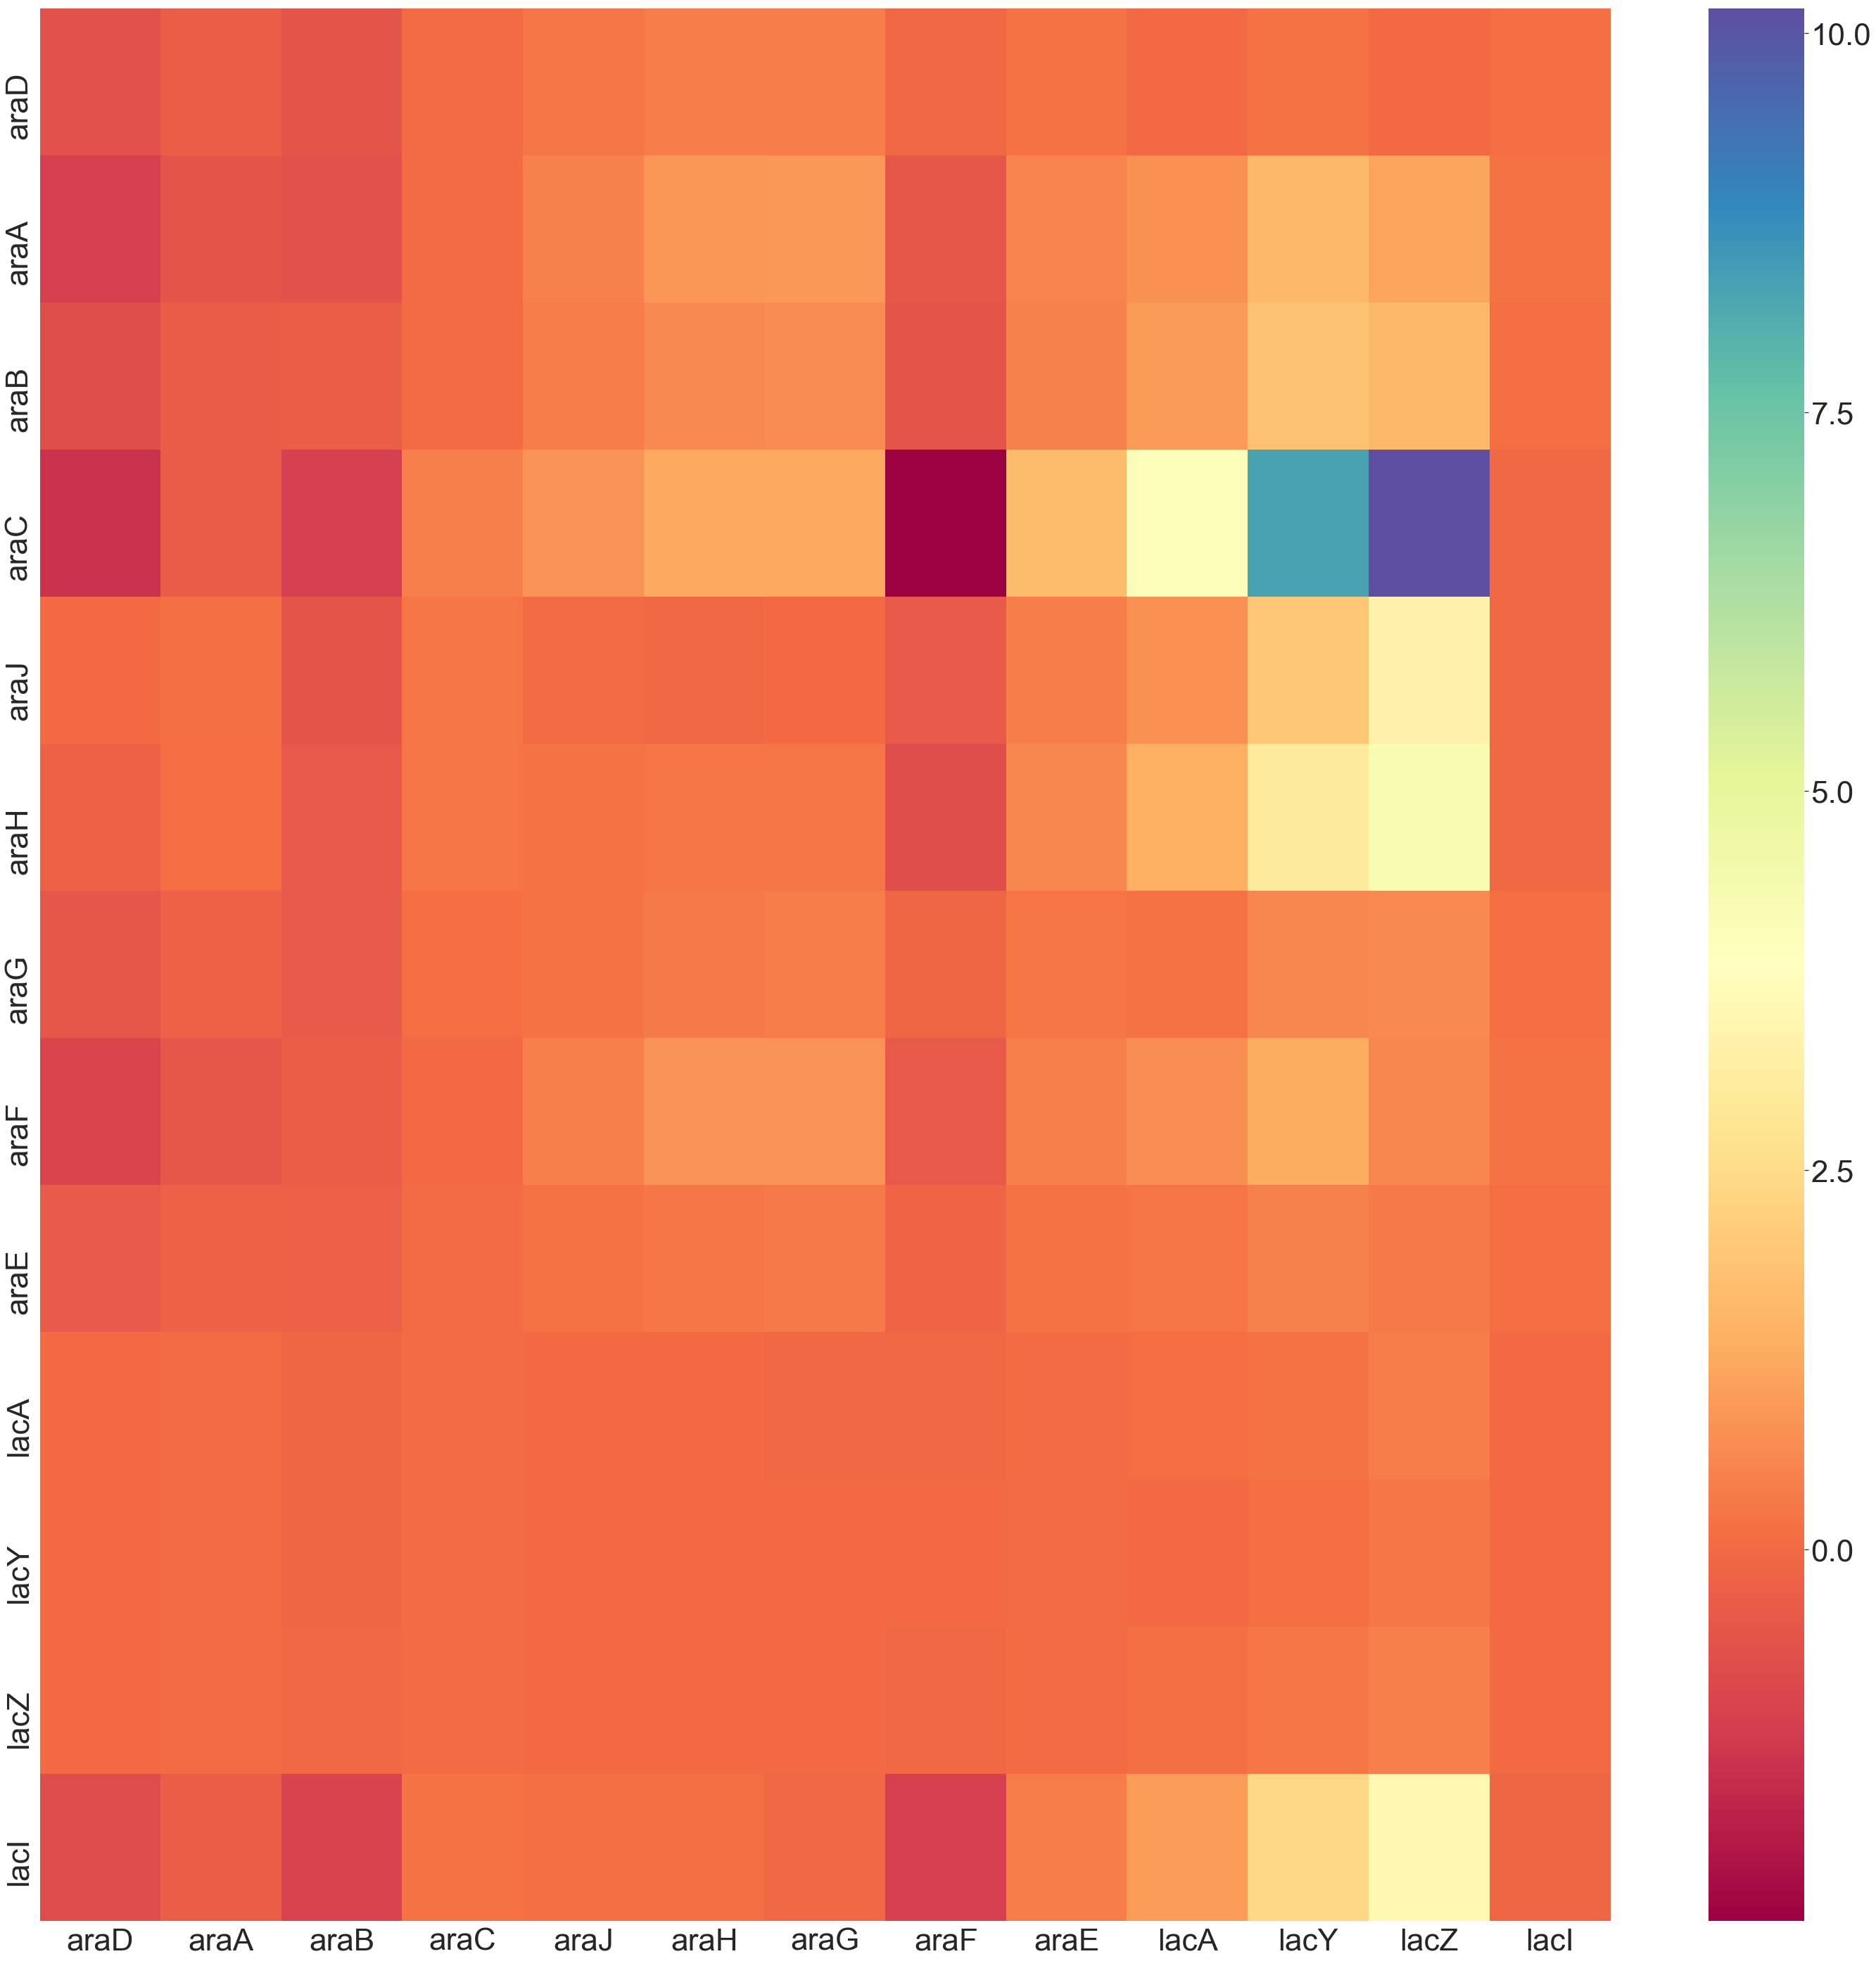

In [338]:
all_genes = list(all_genes)
lambda_val_vec_p = np.expand_dims(np.std(Yp_data,axis=1),axis=1)
lambda_val_vec_f = np.expand_dims(np.std(Yf_data,axis=1),axis=1)
lambda_val_vec = np.std(np.hstack( (lambda_val_vec_p,lambda_val_vec_f)),axis=1)
this_K = calc_Koopman(Yf_data,Yp_data,flag=2,lambda_val=lambda_val_vec)
import seaborn as sns
plt.figure(figsize=(50,50))
all_gene_labels = [all_genes[elem] for elem in common_indices]
sns.set(font_scale=4.0)
sns.heatmap(this_K,cmap='Spectral',xticklabels=all_gene_labels,yticklabels=all_gene_labels)
#plt.savefig('Current_Koopman_Estimate_LowCV.eps')

## Define Input Lifting and Input-Koopman Dynamics - Arabinose Response

WARN: m less than n, problem likely degenerate
WARN: A->p (column pointers) not strictly increasing, column 5 empty
WARN: A->p (column pointers) not strictly increasing, column 6 empty
WARN: A->p (column pointers) not strictly increasing, column 7 empty
WARN: A->p (column pointers) not strictly increasing, column 8 empty
WARN: A->p (column pointers) not strictly increasing, column 9 empty
WARN: A->p (column pointers) not strictly increasing, column 10 empty
WARN: A->p (column pointers) not strictly increasing, column 11 empty
WARN: A->p (column pointers) not strictly increasing, column 12 empty
WARN: A->p (column pointers) not strictly increasing, column 13 empty
WARN: A->p (column pointers) not strictly increasing, column 14 empty
WARN: A->p (column pointers) not strictly increasing, column 15 empty
WARN: A->p (column pointers) not strictly increasing, column 16 empty
WARN: A->p (column pointers) not strictly increasing, column 17 empty
WARN: A->p (column pointers) not strictly increa

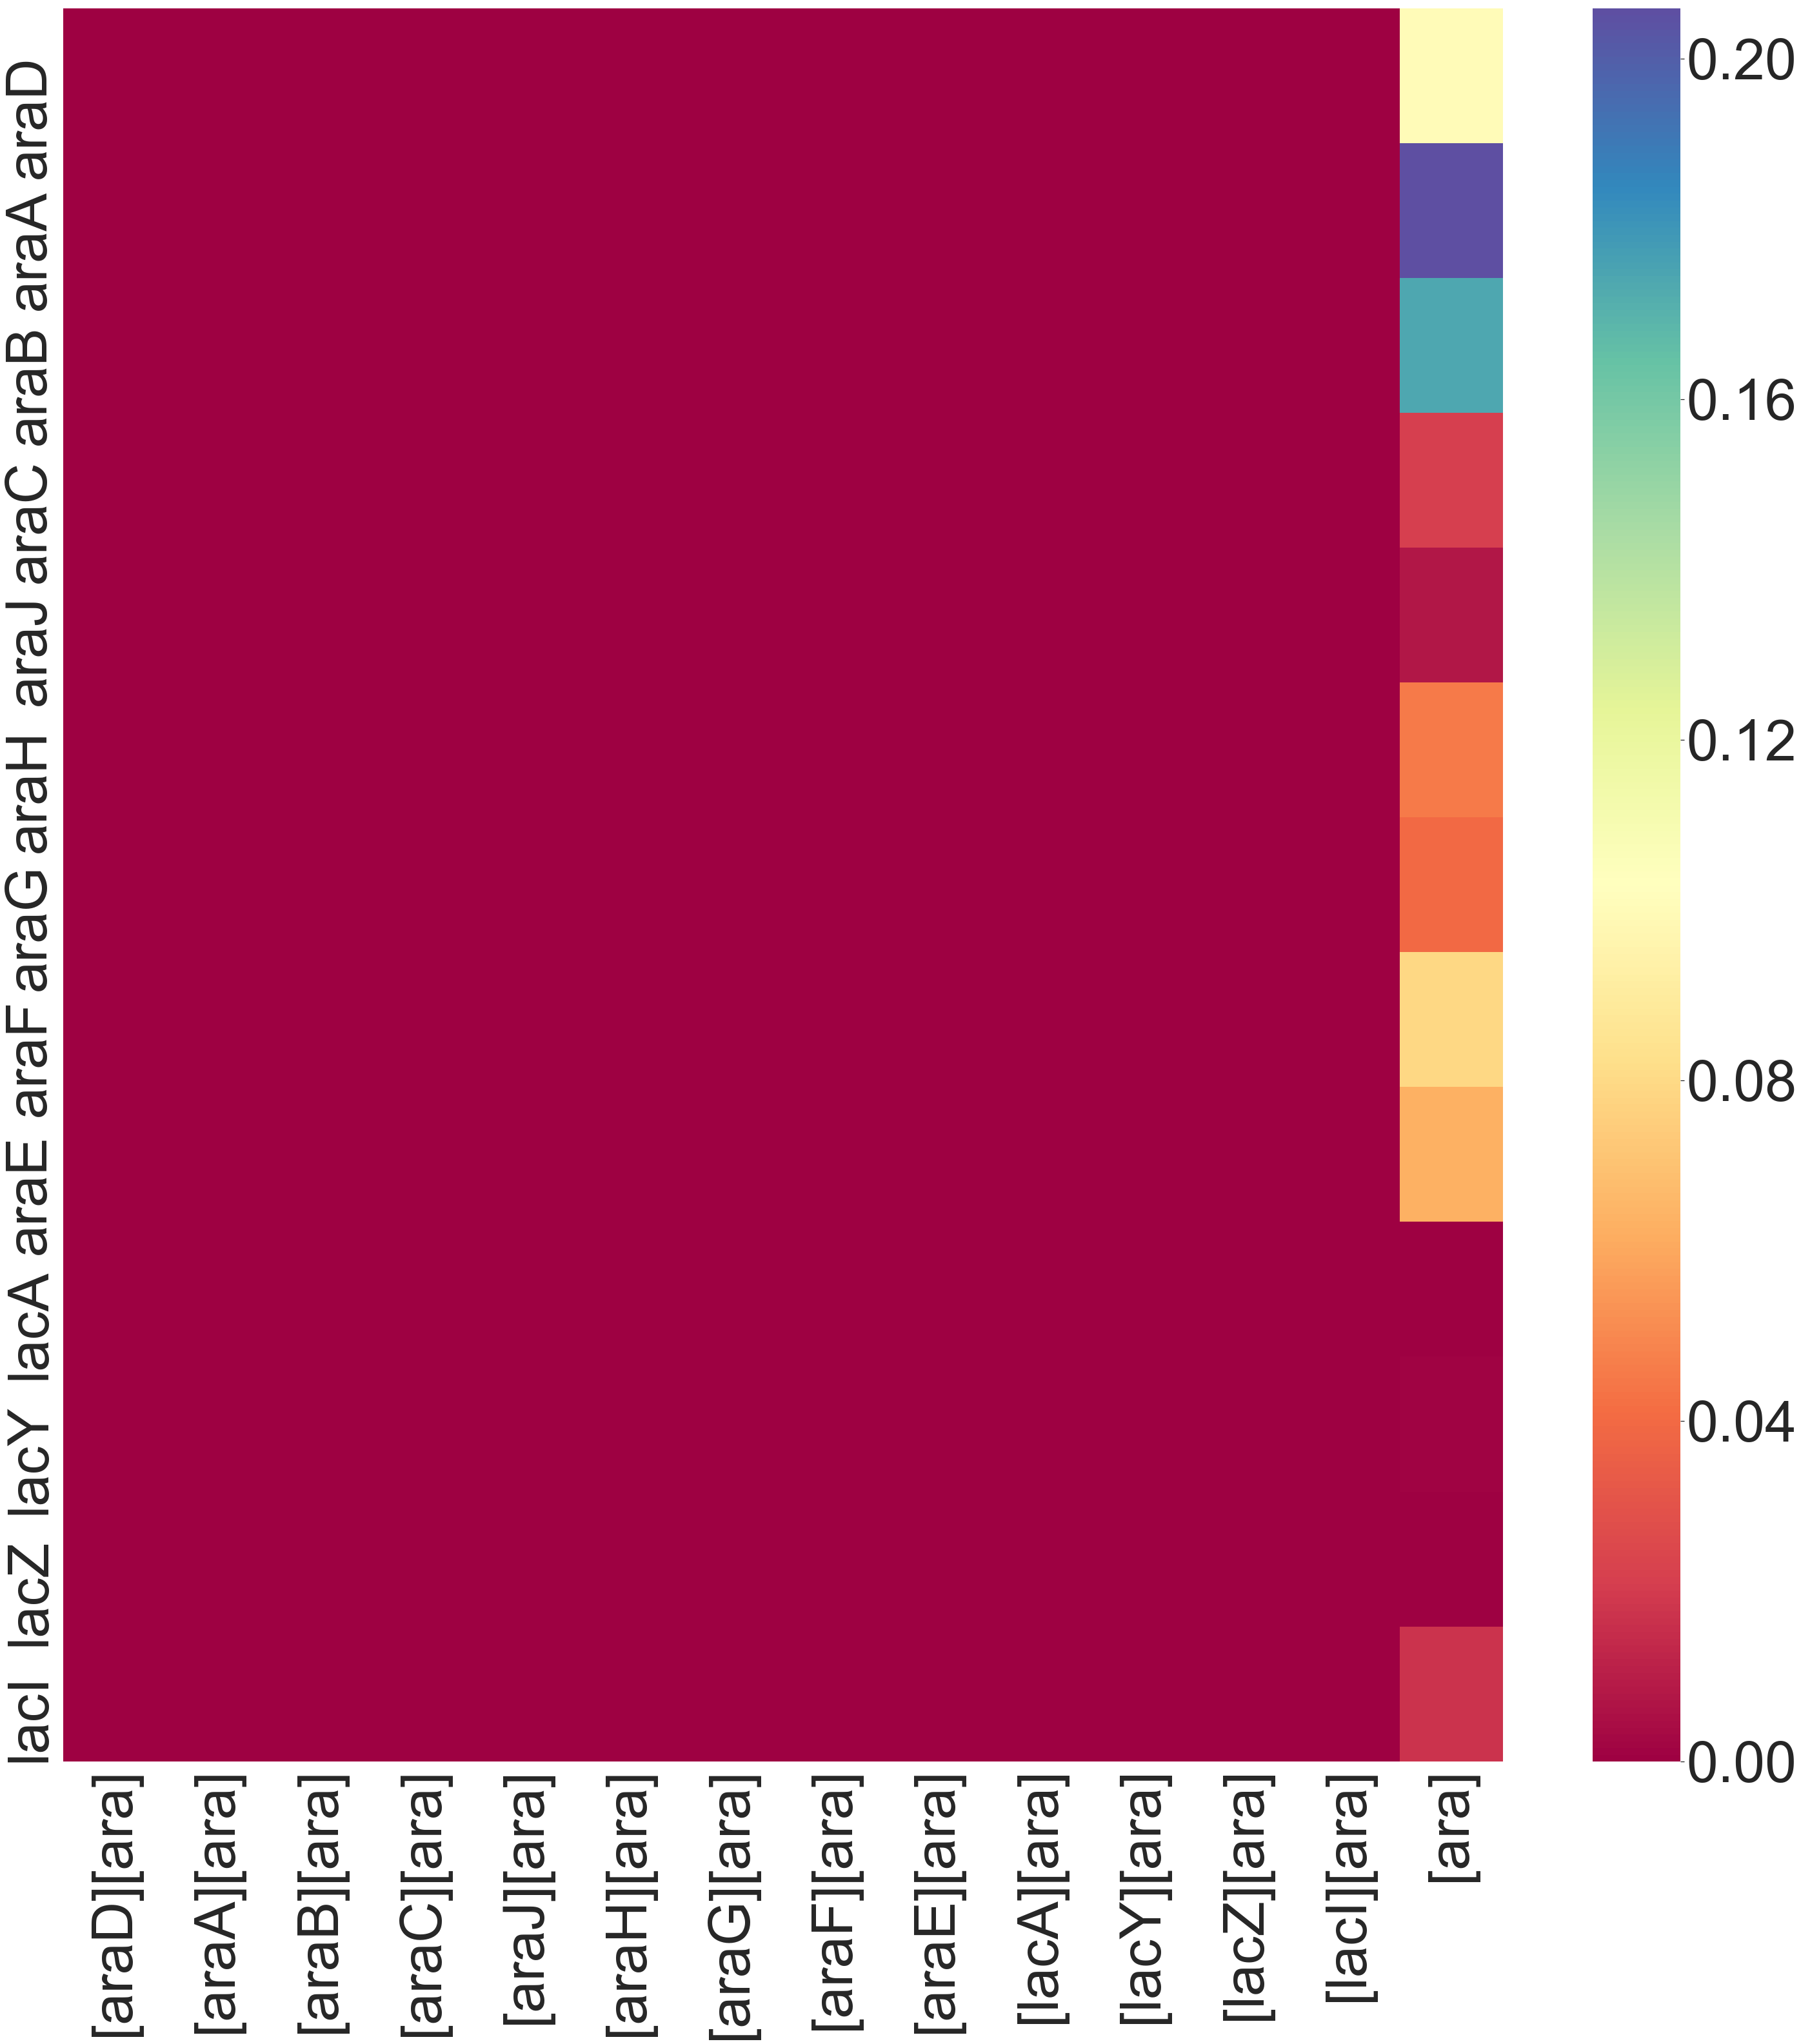

In [344]:
StateLinearDictionary = [lambda x:x[elem] for elem in np.arange(0,len(common_indices),1)];
StateLifting = Lifting(np.arange(1,len(common_indices),1),StateLinearDictionary,len(common_indices))
KM = InputKoopmanModel(this_K,StateLifting,None,None)



InputQuadraticDictionary = []
for elem in np.arange(0,len(common_indices),1):
    exec('g= lambda x:x[' + repr(elem) + ']*x[-1]')
    InputQuadraticDictionary.append(g);


InputQuadraticDictionary = InputQuadraticDictionary+[lambda xu:xu[-1]]; 

InputLifting = Lifting(np.arange(0,len(InputQuadraticDictionary)),InputQuadraticDictionary,len(InputQuadraticDictionary))


#%autoreload
viz_this_set = False; 
timepair_list = [];
for ind_cond in ['10']:
    for temp in ['37']:
        for replicate_ind in ['0','1','2','3']:
            pair_string = [ind_cond+temp+'5'+replicate_ind,ind_cond+temp+'18'+replicate_ind];
            timepair_list.append(pair_string);
            
this_strain_id = 'MG1655_WT'
#this_strain_id = 'MG1655_NAND_Circuit'
#this_strain_id = 'MG1655_pJS007_LALT__P3__PhlF'
#this_strain_id = 'MG1655_IcaR_Gate'
timepoint_5hr_index = 0; 
timepoint_18hr_index = 1; 
T1_list = [];
T2_list = [];
for pair_tuple in timepair_list:
    x_vec = master_dict[this_strain_id][pair_tuple[timepoint_5hr_index]][0]
    y_vec = master_dict[this_strain_id][pair_tuple[timepoint_18hr_index]][0];
    
    T1_list.append(x_vec);
    T2_list.append(y_vec);
    

T1_list = np.asarray(T1_list,dtype=np.float32)
T2_list = np.asarray(T2_list,dtype=np.float32)

T1_list_raw = T1_list; 
T2_list_raw = T2_list;

#T1_list_log = np.log10(T1_list);
#T1_list_log[T1_list_log==-np.Inf] = 0.0;
#T2_list_log = np.log10(T2_list);
#T2_list_log[T2_list_log==-np.Inf] = 0.0;


T1_list = np.asarray(T1_list,dtype=np.float32)
T2_list = np.asarray(T2_list,dtype=np.float32)

T1_list_raw = T1_list; 
T2_list_raw = T2_list;


import sklearn;
from sklearn.preprocessing import Normalizer
transformer1 = Normalizer().fit(T1_list_raw)
T1_list = transformer1.transform(T1_list_raw)

transformer2 = Normalizer().fit(T2_list_raw)
T2_list =  transformer2.transform(T2_list_raw)

T1_list_log_norm = T1_list;
T2_list_log_norm = T2_list;
#T2_list = T2_list_log;

low_cv_reps = [0,2,3]
col_ind_map = [0,0,1,2]

if viz_this_set:
    mu_t1 = np.mean(T1_list[low_cv_reps][:],axis=0);
    s_t1 = np.std(T1_list[low_cv_reps][:],axis=0);

    mu_t2 = np.mean(T2_list[low_cv_reps][:],axis=0);
    s_t2 = np.std(T2_list[low_cv_reps][:],axis=0);
    cv1 = mu_t1-mu_t1;
    cv2 = mu_t2-mu_t2;
    plt.figure()
    plt.scatter((mu_t1[low_cv_indices]),(mu_t2[low_cv_indices]))
    plt.xlim([0.0,1.0])
    plt.figure()
    plt.scatter(mu_t1,mu_t2)
    plt.xlim([0.0,1.0])


Yp_data = np.zeros((len(common_indices),len(low_cv_reps)))
Yf_data = np.zeros((len(common_indices),len(low_cv_reps)))
Up_data = 1e0*np.ones((1,len(low_cv_reps)));
PsiUp = np.zeros( (InputLifting.return_dim(),Up_data.shape[1]));
for ind in range(0,Up_data.shape[1]):
    xu_vec = np.vstack((Yp_data[:,ind].reshape((len(Yp_data[:,ind]),1)),Up_data[:,ind].reshape(len(Up_data[:,ind]),1)))
    PsiUp[:,ind] = InputLifting.eval_lifting_array(xu_vec).flatten();

PsiUpMaxDelta= np.zeros((InputLifting.return_dim(),Up_data.shape[1])); 
std_vec = np.vstack((np.expand_dims(np.std(Yp_data,axis=1),1), np.expand_dims(np.std(Up_data,axis=1),1))  )
for ind in range(0,Up_data.shape[1]):
    xu_vec = np.vstack((Yp_data[:,ind].reshape((len(Yp_data[:,ind]),1)),Up_data[:,ind].reshape(len(Up_data[:,ind]),1)))
    xu_vec = xu_vec + std_vec;
    PsiUpMaxDelta[:,ind] = InputLifting.eval_lifting_array(xu_vec).flatten();

PsiDelta = PsiUpMaxDelta-PsiUp;

    
for col_ind in low_cv_reps:
    Yp_data[:,col_ind_map[col_ind]] = T1_list_log_norm.T[common_indices,col_ind];
    Yf_data[:,col_ind_map[col_ind]]= T2_list_log_norm.T[common_indices,col_ind];




Ki = calc_Input_Koopman(KM.Kol,Yf_data,Yp_data,PsiUp,flag=2,lambda_val=lambda_val_vec,PsiDelta_Mat = PsiDelta)
KM.K_input = Ki;
KM.Ki = Ki;

KM.Psi_input = InputLifting;
KM.Pi = InputLifting;

import seaborn as sns
sns.set(font_scale=8.0)
all_gene_labels = [all_genes[elem] for elem in common_indices]
plt.figure(figsize=(50,50))

this_x_labels = ['['+elem+']' + '' + '[ara]' for elem in all_gene_labels]
this_x_labels = this_x_labels + ['[ara]']
sns.heatmap(Ki,cmap='Spectral',xticklabels=this_x_labels,yticklabels=all_gene_labels)
#plt.figure(figsize=(5,100))
#sns.heatmap(np.expand_dims(Ki[:,-1],axis=1),cmap='Spectral',xticklabels=['ara'],yticklabels=all_gene_labels)



In [342]:
np.expand_dims(np.std(Up_data,axis=1),1)

#np.vstack((np.std(Yf_data,axis=1), np.std(Up_data,axis=1)))

array([[0.]])

# Define PhlF (ara) Input Dynamics

In [352]:

InputLinearDictionary = [None]*len(all_genes)
for elem in np.arange(0,len(all_genes),1):
    exec('g= lambda x:x[' + repr(elem) + ']')
    InputLinearDictionary[elem] = g;
     

InputLifting = Lifting(np.arange(4098,4136,1),InputLinearDictionary,len(all_genes)-4098)

#%autoreload
viz_this_set = False; 
timepair_list = [];
for ind_cond in ['00']:
    for temp in ['37']:
        for replicate_ind in ['0','1','2','3']:
            pair_string = [ind_cond+temp+'5'+replicate_ind,ind_cond+temp+'18'+replicate_ind];
            timepair_list.append(pair_string);
            
#this_strain_id = 'MG1655_WT'
#this_strain_id = 'MG1655_NAND_Circuit'
#this_strain_id = 'MG1655_pJS007_LALT__P3__PhlF'
#this_strain_id = 'MG1655_IcaR_Gate'
this_strain_id = 'MG1655_PhlF_Gate'
timepoint_5hr_index = 0; 
timepoint_18hr_index = 1; 
T1_list = [];
T2_list = [];
for pair_tuple in timepair_list:
    x_vec = master_dict[this_strain_id][pair_tuple[timepoint_5hr_index]][0]
    y_vec = master_dict[this_strain_id][pair_tuple[timepoint_18hr_index]][0];
    
    T1_list.append(x_vec);
    T2_list.append(y_vec);
    

T1_list = np.asarray(T1_list,dtype=np.float32)
T2_list = np.asarray(T2_list,dtype=np.float32)

T1_list_raw = T1_list; 
T2_list_raw = T2_list;


import sklearn;
from sklearn.preprocessing import Normalizer
transformer1 = Normalizer().fit(T1_list_raw)
T1_list = transformer1.transform(T1_list_raw)

transformer2 = Normalizer().fit(T2_list_raw)
T2_list =  transformer2.transform(T2_list_raw)

T1_list_log_norm = T1_list;
T2_list_log_norm = T2_list;

#T1_list_log = np.log10(T1_list);
#T1_list_log[T1_list_log==-np.Inf] = 0.0;
#T2_list_log = np.log10(T2_list);
#T2_list_log[T2_list_log==-np.Inf] = 0.0;

#T1_list = T1_list_log;
#T2_list = T2_list_log;

low_cv_reps = [0,2,3]
col_ind_map = [0,0,1,2]

if viz_this_set:
    mu_t1 = np.mean(T1_list[low_cv_reps][:],axis=0);
    s_t1 = np.std(T1_list[low_cv_reps][:],axis=0);

    mu_t2 = np.mean(T2_list[low_cv_reps][:],axis=0);
    s_t2 = np.std(T2_list[low_cv_reps][:],axis=0);
    cv1 = mu_t1-mu_t1;
    cv2 = mu_t2-mu_t2;
    plt.figure()
    plt.scatter((mu_t1[low_cv_indices]),(mu_t2[low_cv_indices]))
    plt.ylim([0.0,1.0])
    plt.xlim([0.0,1.0])
    plt.figure()
    plt.scatter(mu_t1,mu_t2)
    plt.ylim([0.0,1.0])
    plt.xlim([0.0,1.0])


Yp_data = np.zeros((len(common_indices),len(low_cv_reps)))
Yf_data = np.zeros((len(common_indices),len(low_cv_reps)))
Up_data = 1e0*np.ones((1,len(low_cv_reps)));
PsiUp_Gate = np.zeros( (InputLifting.return_dim(),len(low_cv_reps)));
for ind in range(0,len(low_cv_reps)):
    PsiUp_Gate[:,ind] = InputLifting.eval_lifting_array(T1_list.T[:,ind]).flatten();


for col_ind in low_cv_reps:
    Yp_data[:,col_ind_map[col_ind]] = T1_list_log_norm.T[common_indices,col_ind];
    Yf_data[:,col_ind_map[col_ind]]= T2_list_log_norm.T[common_indices,col_ind];

lambda_uamend_val_vec = np.std(PsiUp_Gate,axis=1);
Ki = calc_Append_Input_Koopman(KM.Kol,KM.Ki,Yf_data,Yp_data,PsiUp,PsiUp_Gate,flag=2,lambda_uamend_val=lambda_uamend_val_vec)
KM.append_input(Ki,InputLifting)

import seaborn as sns
plt.figure(figsize=(60,50))
all_gene_labels = [all_genes[elem] for elem in common_indices]

sns.heatmap(Ki,cmap='Spectral',xticklabels=Circuit_Gene_Names,yticklabels=all_gene_labels)

ValueError: Incompatible dimensions (13, 38) (1, 114)

# Discover IPTG Response Dynamics

In [279]:
StateLinearDictionary = [lambda x:x[elem] for elem in np.arange(0,len(common_indices),1)];
StateLifting = Lifting(np.arange(1,len(common_indices),1),StateLinearDictionary,len(common_indices))
KM = InputKoopmanModel(this_K,StateLifting,None,None)



InputQuadraticDictionary = []
for elem in np.arange(0,len(common_indices),1):
    exec('g= lambda x:x[' + repr(elem) + ']*x[-1]')
    InputQuadraticDictionary.append(g);


InputQuadraticDictionary = InputQuadraticDictionary+[lambda xu:xu[-1]]; 

InputLifting = Lifting(np.arange(0,len(InputQuadraticDictionary)),InputQuadraticDictionary,len(InputQuadraticDictionary))


#%autoreload
viz_this_set = False; 
timepair_list = [];
for ind_cond in ['01']:
    for temp in ['37']:
        for replicate_ind in ['0','1','2','3']:
            pair_string = [ind_cond+temp+'5'+replicate_ind,ind_cond+temp+'18'+replicate_ind];
            timepair_list.append(pair_string);
            
this_strain_id = 'MG1655_WT'
#this_strain_id = 'MG1655_NAND_Circuit'
#this_strain_id = 'MG1655_pJS007_LALT__P3__PhlF'
#this_strain_id = 'MG1655_IcaR_Gate'
timepoint_5hr_index = 0; 
timepoint_18hr_index = 1; 
T1_list = [];
T2_list = [];
for pair_tuple in timepair_list:
    x_vec = master_dict[this_strain_id][pair_tuple[timepoint_5hr_index]][0]
    y_vec = master_dict[this_strain_id][pair_tuple[timepoint_18hr_index]][0];
    
    T1_list.append(x_vec);
    T2_list.append(y_vec);
    

T1_list = np.asarray(T1_list,dtype=np.float32)
T2_list = np.asarray(T2_list,dtype=np.float32)

T1_list_raw = T1_list; 
T2_list_raw = T2_list;

#T1_list_log = np.log10(T1_list);
#T1_list_log[T1_list_log==-np.Inf] = 0.0;
#T2_list_log = np.log10(T2_list);
#T2_list_log[T2_list_log==-np.Inf] = 0.0;


T1_list = np.asarray(T1_list,dtype=np.float32)
T2_list = np.asarray(T2_list,dtype=np.float32)

T1_list_raw = T1_list; 
T2_list_raw = T2_list;


import sklearn;
from sklearn.preprocessing import Normalizer
transformer1 = Normalizer().fit(T1_list_raw)
T1_list = transformer1.transform(T1_list_raw)

transformer2 = Normalizer().fit(T2_list_raw)
T2_list =  transformer2.transform(T2_list_raw)

T1_list_log_norm = T1_list;
T2_list_log_norm = T2_list;
#T2_list = T2_list_log;

low_cv_reps = [0,2,3]
col_ind_map = [0,0,1,2]

if viz_this_set:
    mu_t1 = np.mean(T1_list[low_cv_reps][:],axis=0);
    s_t1 = np.std(T1_list[low_cv_reps][:],axis=0);

    mu_t2 = np.mean(T2_list[low_cv_reps][:],axis=0);
    s_t2 = np.std(T2_list[low_cv_reps][:],axis=0);
    cv1 = mu_t1-mu_t1;
    cv2 = mu_t2-mu_t2;
    plt.figure()
    plt.scatter((mu_t1[low_cv_indices]),(mu_t2[low_cv_indices]))
    plt.xlim([0.0,1.0])
    plt.figure()
    plt.scatter(mu_t1,mu_t2)
    plt.xlim([0.0,1.0])


Yp_data = np.zeros((len(common_indices),len(low_cv_reps)))
Yf_data = np.zeros((len(common_indices),len(low_cv_reps)))
Up_data = 1e0*np.ones((1,len(low_cv_reps)));
PsiUp = np.zeros( (InputLifting.return_dim(),Up_data.shape[1]));
for ind in range(0,Up_data.shape[1]):
    xu_vec = np.vstack((Yp_data[:,ind].reshape((len(Yp_data[:,ind]),1)),Up_data[:,ind].reshape(len(Up_data[:,ind]),1)))
    PsiUp[:,ind] = InputLifting.eval_lifting_array(xu_vec).flatten();


for col_ind in low_cv_reps:
    Yp_data[:,col_ind_map[col_ind]] = T1_list_log_norm.T[common_indices,col_ind];
    Yf_data[:,col_ind_map[col_ind]]= T2_list_log_norm.T[common_indices,col_ind];


    
Ki = calc_Input_Koopman(KM.Kol,Yf_data,Yp_data,PsiUp,flag=2,lambda_val=0.1)
KM.K_input = Ki;
KM.Ki = Ki;

KM.Psi_input = InputLifting;
KM.Pi = InputLifting;

import seaborn as sns
plt.figure(figsize=(5,100))
sns.set(font_scale=8.0)
all_gene_labels = [all_genes[elem] for elem in common_indices]
sns.heatmap(Ki[:,-1],cmap='Spectral',xticklabels=['IPTG'],yticklabels=all_gene_labels)



----------------------------------------------------------------------------
	SCS v2.1.0 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 229
eps = 1.00e-04, alpha = 1.50, max_iters = 10000000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-03
Variables n = 187, constraints m = 229
Cones:	soc vars: 229, soc blks: 5
Setup time: 5.90e-03s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 5.97e+19  9.85e+19  1.00e+00 -6.13e+19  1.40e+19  1.40e+19  8.26e-03 
    40| 5.17e-06  4.29e-06  6.80e-07  9.99e-02  9.99e-02  1.40e-17  9.75e-03 
----------------------------------------------------------------------------
Status: Solved
Timing: Solve time: 

IndexError: Inconsistent shape between the condition and the input (got (13, 1) and (13,))

<Figure size 360x7200 with 0 Axes>

## Define PhlF (IPTG) Gate Lifting and Input-Dynamics

ERROR: Line magic function `%autoreload` not found.


----------------------------------------------------------------------------
	SCS v1.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2016
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 2763, CG tol ~ 1/iter^(2.00)
eps = 1.00e-03, alpha = 1.50, max_iters = 10000000, normalize = 1, scale = 1.00
Variables n = 992, constraints m = 1034
Cones:	linear vars: 988
	soc vars: 46, soc blks: 4
Setup time: 1.65e-03s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0|      inf       inf       nan      -inf       inf       inf  1.08e-03 
    60| 2.54e-05  4.96e-04  2.97e-05  2.83e-02  2.83e-02  3.87e-17  5.20e-03 
----------------------------------------------------------------------------
Status: Solved
Timing: Solve t

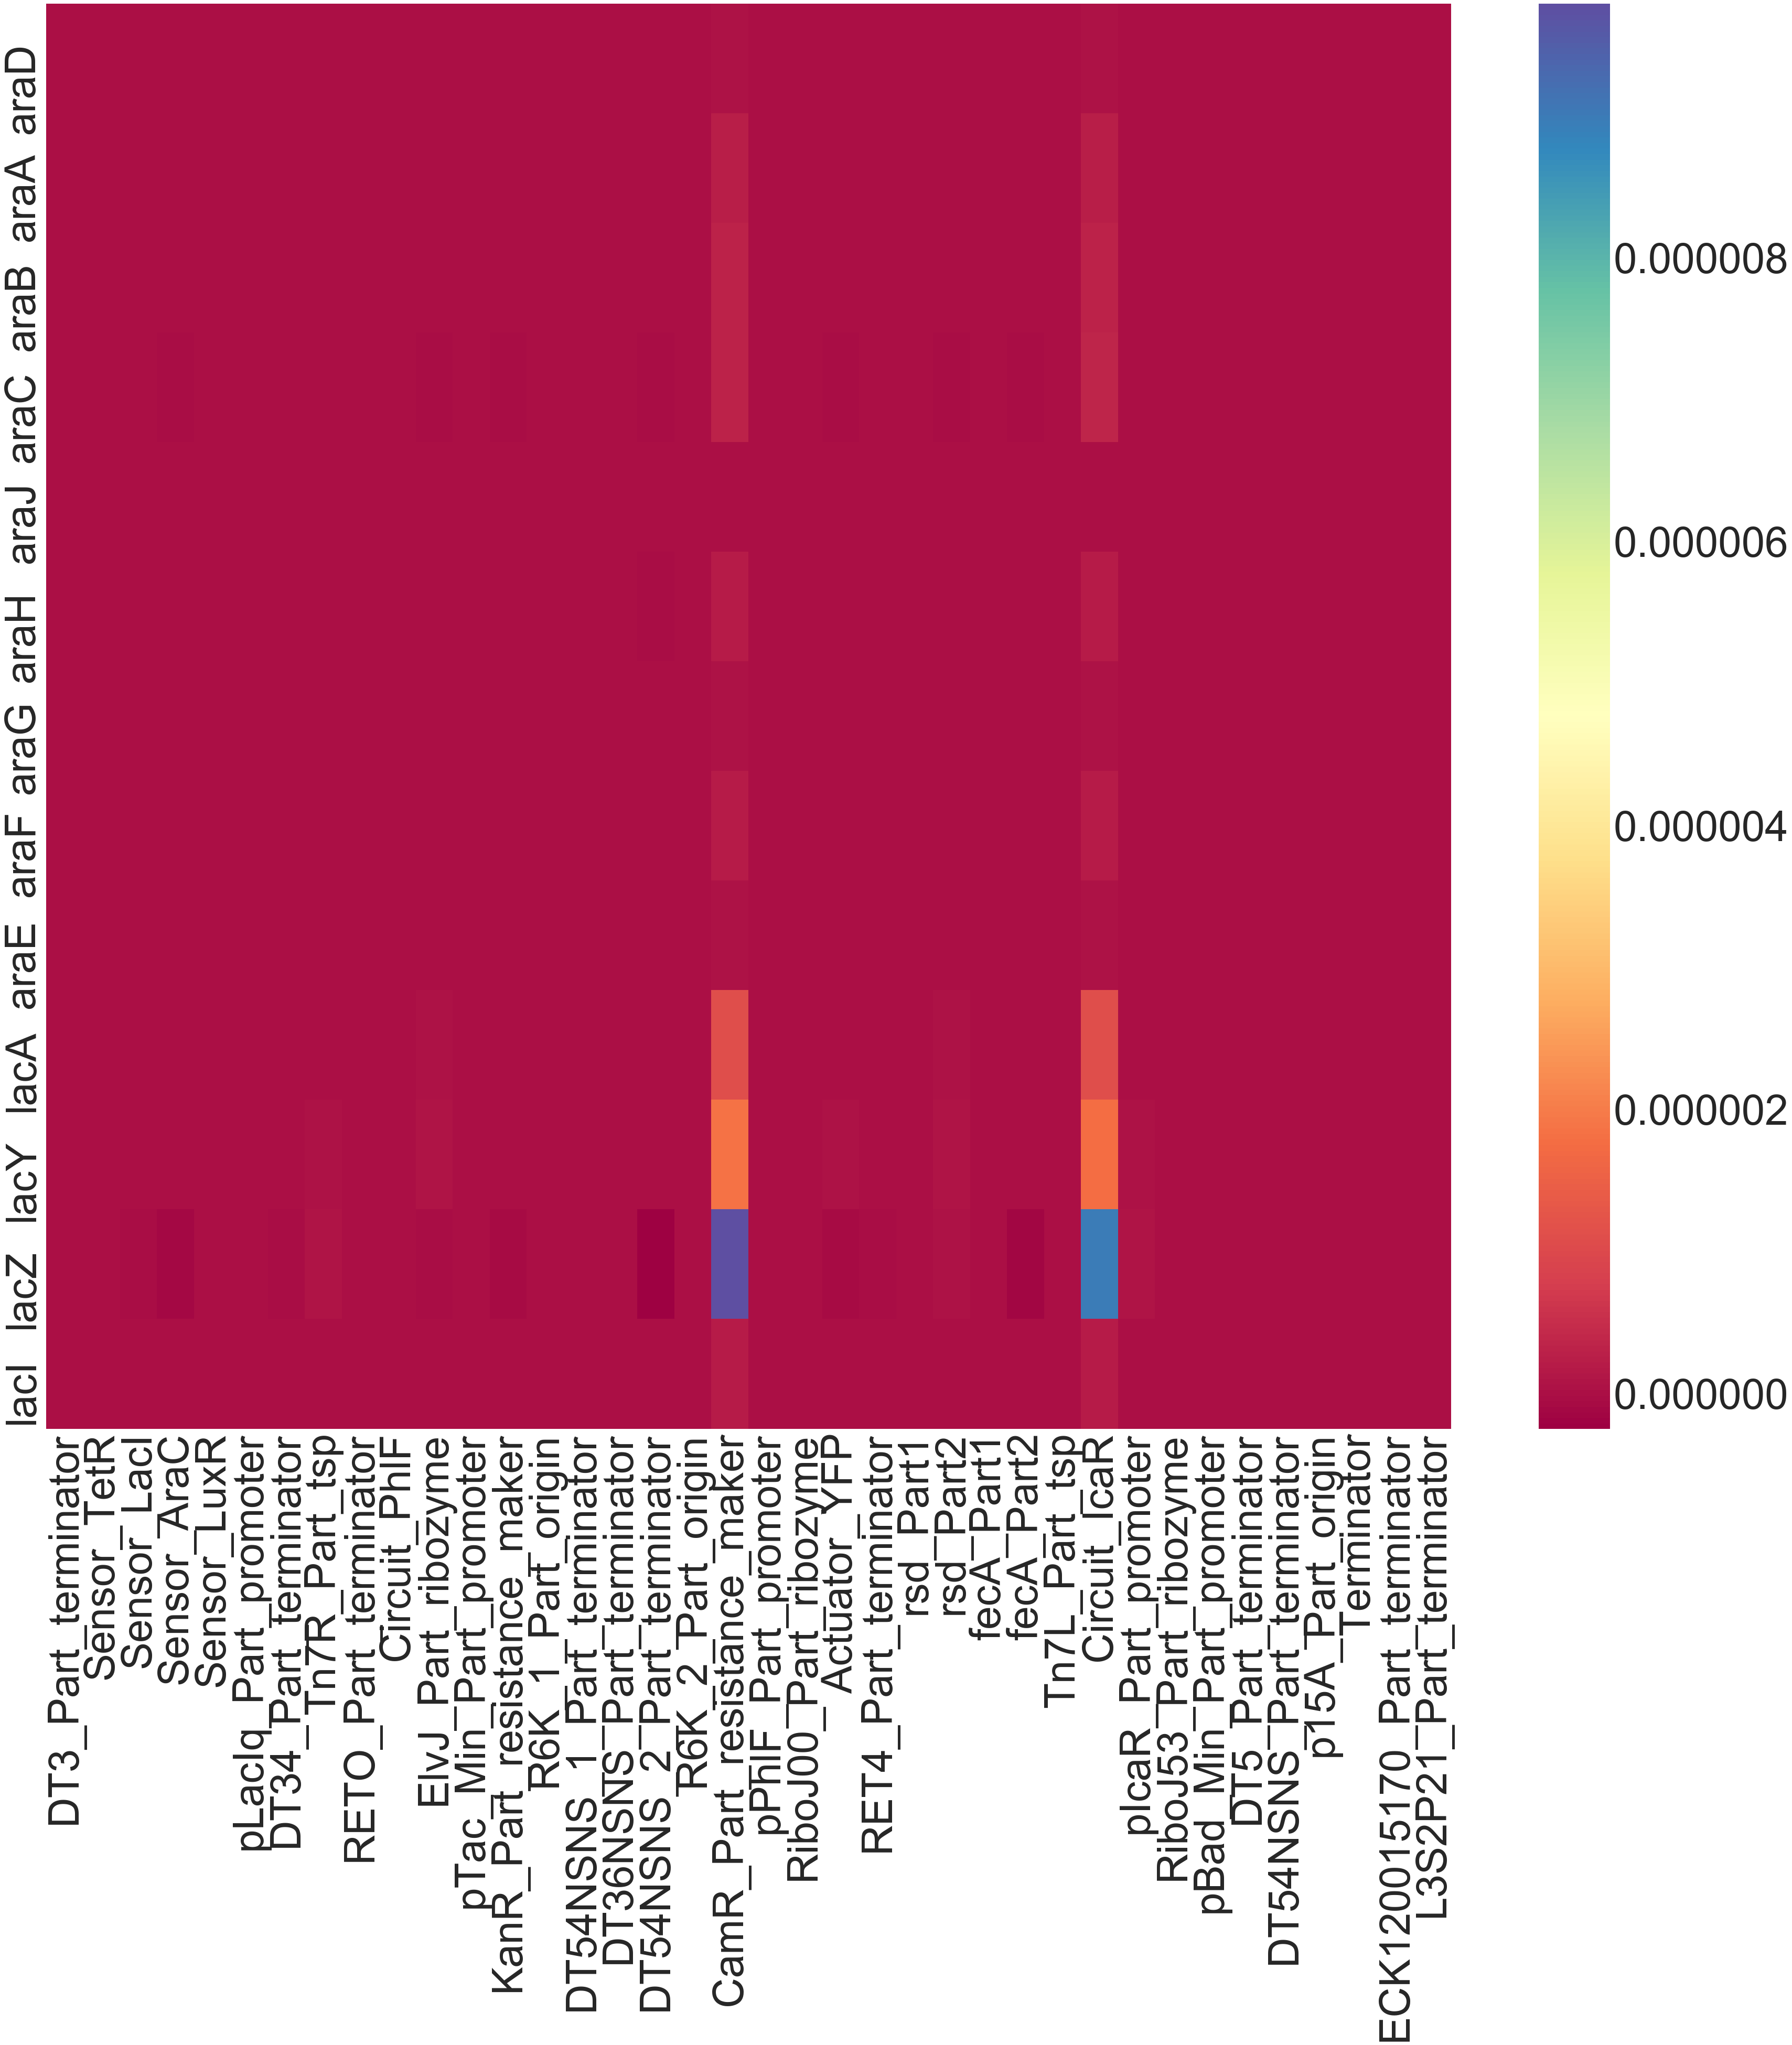

In [70]:

InputLinearDictionary = [None]*len(all_genes)
for elem in np.arange(0,len(all_genes),1):
    exec('g= lambda x:x[' + repr(elem) + ']')
    InputLinearDictionary[elem] = g;
     

InputLifting = Lifting(np.arange(4098,4136,1),InputLinearDictionary,len(all_genes)-4098)

%autoreload
viz_this_set = False; 
timepair_list = [];
for ind_cond in ['01']:
    for temp in ['37']:
        for replicate_ind in ['0','1','2','3']:
            pair_string = [ind_cond+temp+'5'+replicate_ind,ind_cond+temp+'18'+replicate_ind];
            timepair_list.append(pair_string);
            
#this_strain_id = 'MG1655_WT'
#this_strain_id = 'MG1655_NAND_Circuit'
#this_strain_id = 'MG1655_pJS007_LALT__P3__PhlF'
this_strain_id = 'MG1655_IcaR_Gate'
#this_strain_id = 'MG1655_PhlF_Gate'
timepoint_5hr_index = 0; 
timepoint_18hr_index = 1; 
T1_list = [];
T2_list = [];
for pair_tuple in timepair_list:
    x_vec = master_dict[this_strain_id][pair_tuple[timepoint_5hr_index]][0]
    y_vec = master_dict[this_strain_id][pair_tuple[timepoint_18hr_index]][0];
    
    T1_list.append(x_vec);
    T2_list.append(y_vec);
    

T1_list = np.asarray(T1_list,dtype=np.float32)
T2_list = np.asarray(T2_list,dtype=np.float32)

T1_list_raw = T1_list; 
T2_list_raw = T2_list;


import sklearn;
from sklearn.preprocessing import Normalizer
transformer1 = Normalizer().fit(T1_list_raw)
T1_list = transformer1.transform(T1_list_raw)

transformer2 = Normalizer().fit(T2_list_raw)
T2_list =  transformer2.transform(T2_list_raw)

T1_list_log_norm = T1_list;
T2_list_log_norm = T2_list;

#T1_list_log = np.log10(T1_list);
#T1_list_log[T1_list_log==-np.Inf] = 0.0;
#T2_list_log = np.log10(T2_list);
#T2_list_log[T2_list_log==-np.Inf] = 0.0;

#T1_list = T1_list_log;
#T2_list = T2_list_log;

low_cv_reps = [0,2,3]
col_ind_map = [0,0,1,2]

if viz_this_set:
    mu_t1 = np.mean(T1_list[low_cv_reps][:],axis=0);
    s_t1 = np.std(T1_list[low_cv_reps][:],axis=0);

    mu_t2 = np.mean(T2_list[low_cv_reps][:],axis=0);
    s_t2 = np.std(T2_list[low_cv_reps][:],axis=0);
    cv1 = mu_t1-mu_t1;
    cv2 = mu_t2-mu_t2;
    plt.figure()
    plt.scatter((mu_t1[low_cv_indices]),(mu_t2[low_cv_indices]))
    plt.ylim([0.0,1.0])
    plt.xlim([0.0,1.0])
    plt.figure()
    plt.scatter(mu_t1,mu_t2)
    plt.ylim([0.0,1.0])
    plt.xlim([0.0,1.0])


Yp_data = np.zeros((len(common_indices),len(low_cv_reps)))
Yf_data = np.zeros((len(common_indices),len(low_cv_reps)))
Up_data = 1e0*np.ones((1,len(low_cv_reps)));
PsiUp_Gate = np.zeros( (InputLifting.return_dim(),len(low_cv_reps)));
for ind in range(0,len(low_cv_reps)):
    PsiUp_Gate[:,ind] = InputLifting.eval_lifting_array(T1_list.T[:,ind]).flatten();


for col_ind in low_cv_reps:
    Yp_data[:,col_ind_map[col_ind]] = T1_list_log_norm.T[common_indices,col_ind];
    Yf_data[:,col_ind_map[col_ind]]= T2_list_log_norm.T[common_indices,col_ind];


    
Ki = calc_Append_Input_Koopman(KM.Kol,KM.Ki,Yf_data,Yp_data,PsiUp,PsiUp_Gate,flag=2,lambda_val=0.1)


KM.append_input(Ki,InputLifting)

import seaborn as sns
plt.figure(figsize=(60,50))
all_gene_labels = [all_genes[elem] for elem in common_indices]

sns.heatmap(Ki,cmap='Spectral',xticklabels=Circuit_Gene_Names,yticklabels=all_gene_labels)

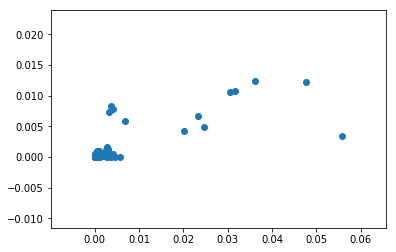

In [300]:
plt.scatter(T1_list.T[4098:4136,:],T2_list.T[4098:4136,:])

In [308]:
np.linalg.norm(KM,ord=2)

6.2829456

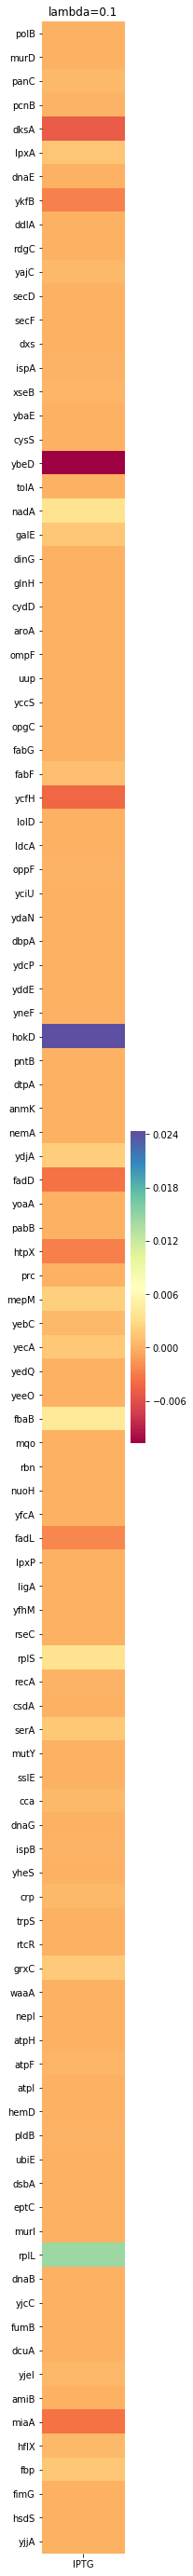

In [317]:
    plt.figure(figsize=(2,50))
    plt.title('lambda='+repr(0.1)); 
    sns.heatmap(Ki[:,-1],cmap='Spectral',yticklabels=all_gene_labels,xticklabels=['IPTG'])
    plt.show()

In [182]:
#all_genes[common_indices[153]]
#all_genes[common_indices[254]]
#all_genes[common_indices[125]]
#all_genes[common_indices[244]] #lpp 
temp_indices = range(0,this_K.shape[0],1);
#temp_indices.remove(244); 
#temp_indices.remove(125);
#temp_indices.remove(254)
#temp_indices.remove(153)
plt.figure(figsize=(50,50))
plt.title('lambda='+repr(lambda_val_real)); 
sns.heatmap(this_K[temp_indices,temp_indices],cmap='Spectral')#,xticklabels=all_gene_labels,yticklabels=all_gene_labels)
plt.show()

NameError: name 'lambda_val_real' is not defined

<Figure size 5000x5000 with 0 Axes>

In [ ]:
import scipy.sparse as sp
import scipy.sparse.linalg as spl
sparse_K = sp.coo_matrix(this_K)
d,v = spl.eigs(sparse_K,k=10)

list_all_genes = list(all_genes);
for row_ind in range(0,this_K.shape[0]):
    for col_ind in range(0,this_K.shape[1]):
        if (np.abs(this_K[row_ind][col_ind]) >5e-1) and (row_ind != col_ind):
            #if common_indices[col_ind] in circuit_ids or common_indices[row_ind] in circuit_ids:
                print(list_all_genes[common_indices[row_ind]] + " is affected by " +list_all_genes[common_indices[col_ind]])


circuit_to_host_K = this_K[:,circuit_coords_in_K]
#print(circuit_to_host_K[circuit_to_host_K>5e-11])

import seaborn as sns


host_to_circuit_K = this_K[circuit_coords_in_K,:]
#print(host_to_circuit_K[host_to_circuit_K>5e-11])
